<a href="https://colab.research.google.com/github/PeronxD/Python/blob/main/K_Folds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este é um trabalho para analisar como a validação cruzada ajuda em modelos de classificação, nesse caso usei a técnica "k-fold", com k=5.
Para isso foi utilizado um conjunto de dados de Churn.
Como o objetivo desse trabalho não é estudar o melhor modelo, eu peguei 3 dos que estava estudando em um livro.

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, train_test_split


In [313]:
import warnings
warnings.filterwarnings("ignore")


In [314]:
dados = pd.read_csv('/content/Customer-Churn.csv')

In [315]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [316]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              7043 non-null   int64  
 1   Conjuge                  7043 non-null   object 
 2   Dependentes              7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefoneFixo             7043 non-null   object 
 5   VariasLinhasTelefonicas  7043 non-null   object 
 6   ServicoDeInternet        7043 non-null   object 
 7   SegurancaOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroNoDispositivo      7043 non-null   object 
 10  SuporteTecnico           7043 non-null   object 
 11  TVaCabo                  7043 non-null   object 
 12  StreamingDeFilmes        7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagamentoOnline         

In [317]:
dados_final.Churn.value_counts() # Aqui notamos que os dados são desbalanceados,para melhorar os resultados devemos balancear

Churn
0    5174
1    5174
Name: count, dtype: int64

In [318]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=1234)
X, y = smt.fit_resample(X, y)
#junção dos dados balanceados
dados = pd.concat([X, y], axis=1)

In [319]:
dados.Churn.value_counts() # dados balanceados

Churn
0    5174
1    5174
Name: count, dtype: int64

Devemos deixar nossa base de dados de uma maneira que nossos modelos consigam ler, então a partir daqui trataremos as variáveis com trasformações.

In [320]:
traducao_dic = {'Sim': 1,
                'Nao': 0}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [321]:
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                axis=1))

In [322]:
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)

In [323]:
dummies.head()

,Maior65Anos,MesesDeContrato,ContaMensal,Conjuge_Nao,Conjuge_Sim,Dependentes_Nao,Dependentes_Sim,TelefoneFixo_Nao,TelefoneFixo_Sim,VariasLinhasTelefonicas_Nao,...,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,PagamentoOnline_Nao,PagamentoOnline_Sim,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn_Nao,Churn_Sim
0,0,1,29.85,False,True,True,False,True,False,False,...,True,False,False,True,False,True,False,False,True,False
1,0,34,56.95,True,False,True,False,False,True,True,...,False,True,True,False,False,False,True,False,True,False
2,0,2,53.85,True,False,True,False,False,True,True,...,True,False,False,True,False,False,True,False,False,True
3,0,45,42.30,True,False,True,False,True,False,False,...,False,True,True,False,False,False,False,True,True,False
4,0,2,70.70,True,False,True,False,False,True,True,...,True,False,False,True,False,True,False,False,False,True


In [324]:
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [325]:
from sklearn.preprocessing import StandardScaler

In [326]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26983133, -0.52696167, -2.99165506, ...,  1.0591488 ,
        -0.54384519, -0.53294491],
       [-0.78750617, -0.52696167,  0.33426314, ..., -0.9441544 ,
         1.83875855, -0.53294491],
       [-0.78750617, -0.52696167,  0.33426314, ..., -0.9441544 ,
         1.83875855, -0.53294491],
       ...,
       [-0.78750617, -0.52696167,  0.33426314, ...,  1.0591488 ,
        -0.54384519, -0.53294491],
       [-0.78750617, -0.52696167,  0.33426314, ...,  1.0591488 ,
        -0.54384519,  1.87636655],
       [ 1.26983133, -0.52696167, -2.99165506, ..., -0.9441544 ,
        -0.54384519,  1.87636655]])

Nesse momento iremos começar a construir os modelos para verificar como o "k-fold" pode ajudar.
Usarei Árvore de Decisão, Regressão Logística e Máquina de Vetores de Suporte (SVM).

*obs: no modelo de árvore de decisão optei pelo critério de entropia*

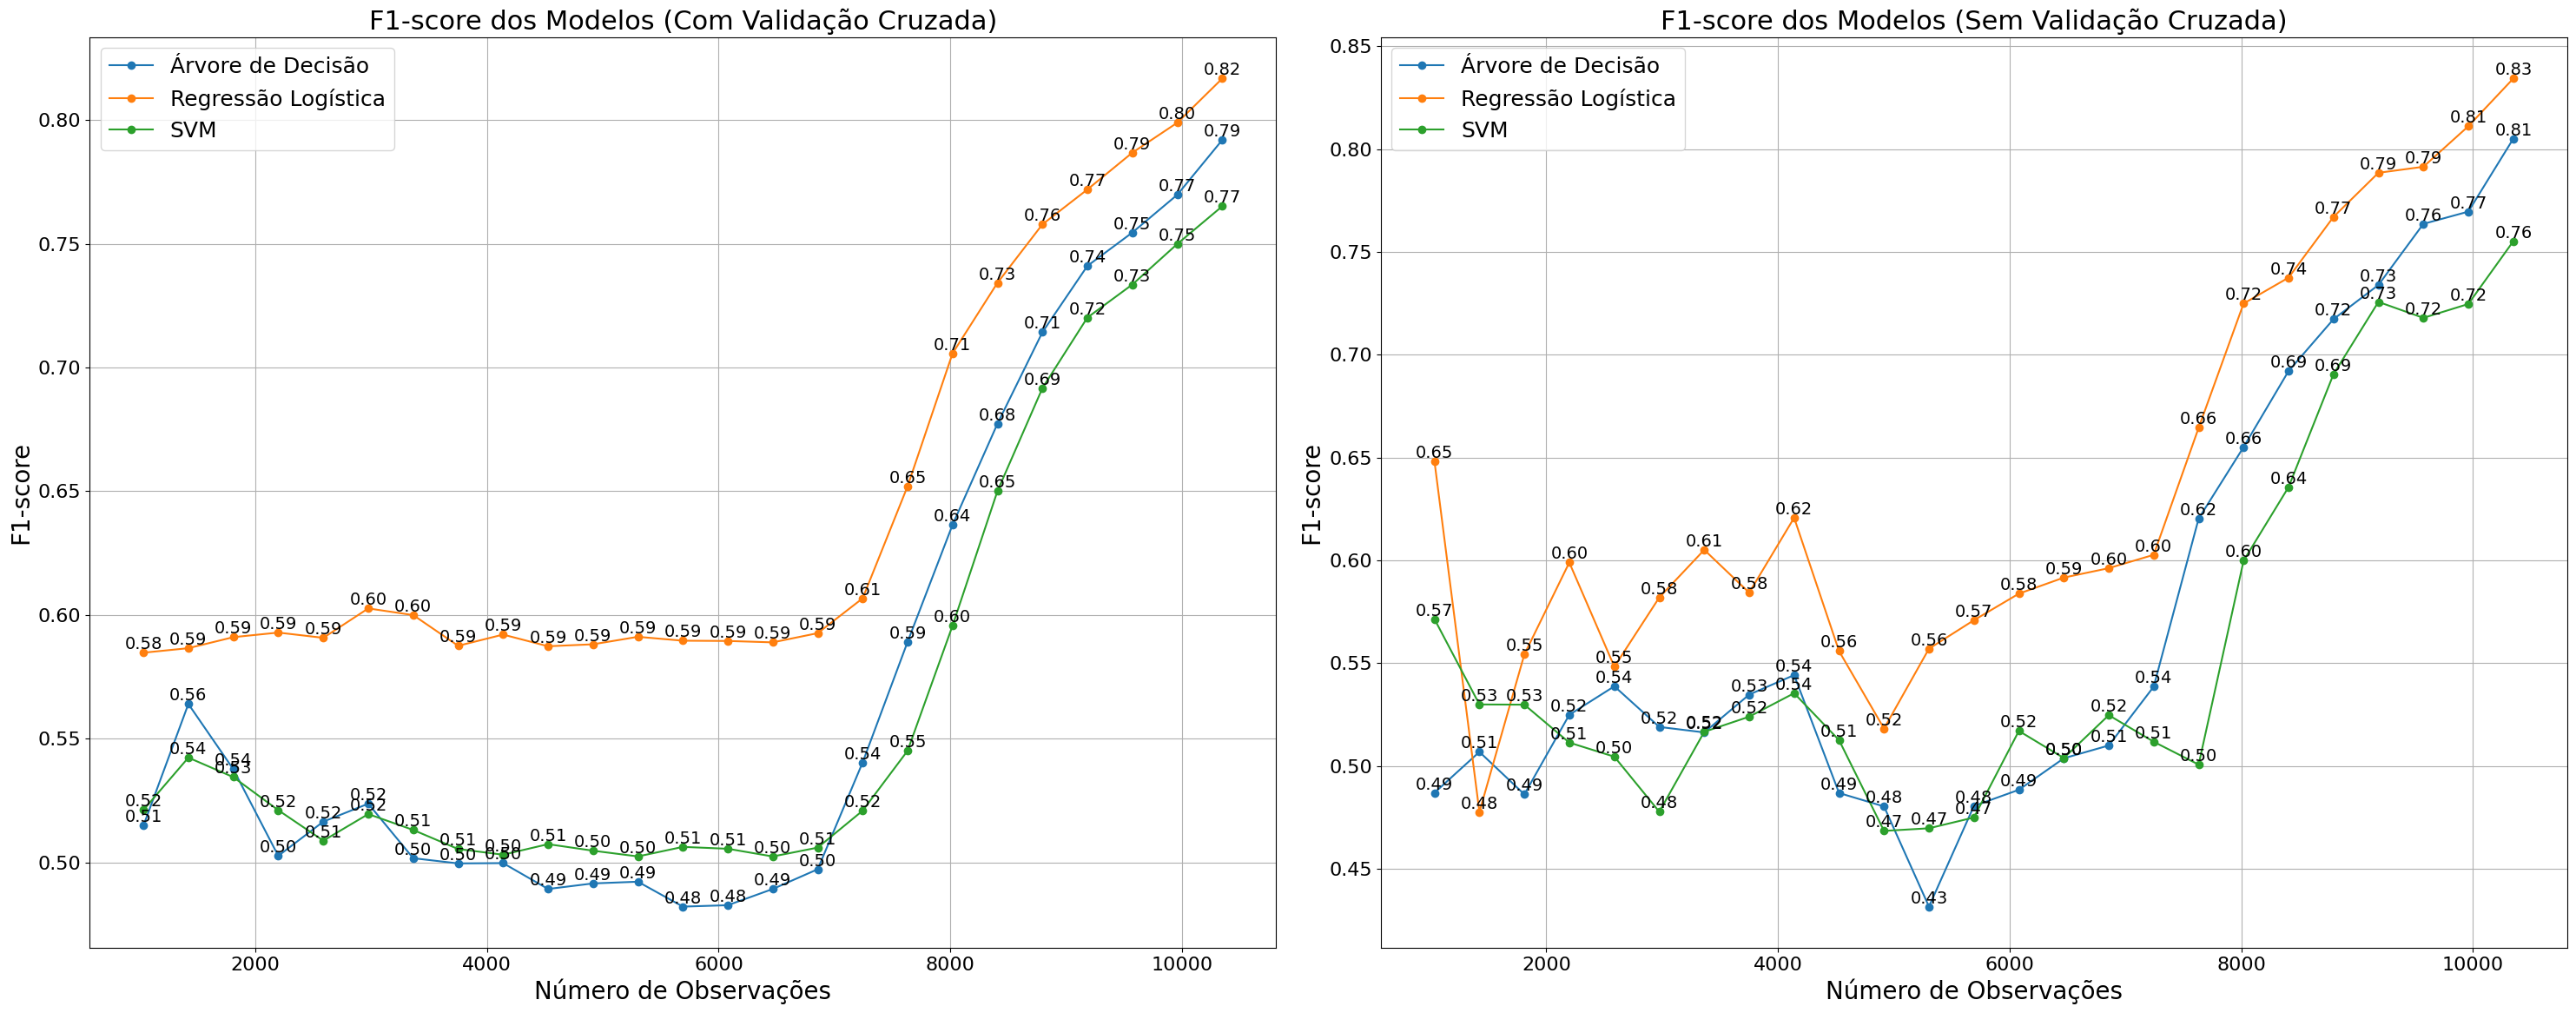

In [328]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score

# Supondo que as variáveis X e y já estejam definidas
# Definição dos modelos
modelo_arvore_decisao = DecisionTreeClassifier(random_state=1234, criterion='entropy')
modelo_regressao_log = LogisticRegression(random_state=1234)
modelo_svm = SVC(random_state=1234)

# Definir os tamanhos de subconjuntos de dados para treinamento
subconjuntos = np.linspace(0.1, 1.0, 25) * len(X)
subconjuntos = subconjuntos.astype(int)

# Listas para armazenar os scores médios de F1-score com validação cruzada
arvores_f1_score_media = []
rl_f1_score_media = []
svm_f1_score_media = []

# Listas para armazenar os F1-scores nos dados de teste
arvores_f1_scores = []
rl_f1_scores = []
svm_f1_scores = []

# Realizar a validação cruzada k-fold com k=5 (5 folds) para diferentes tamanhos de subconjuntos
k = 5
for tamanho in subconjuntos:
    X_sub, y_sub = X[:tamanho], y[:tamanho]

    # Validação cruzada para o F1-score da árvore de decisão
    arvores_f1_score = np.mean(cross_val_score(modelo_arvore_decisao, X_sub, y_sub, cv=k, scoring='f1'))
    arvores_f1_score_media.append(arvores_f1_score)

    # Validação cruzada para o F1-score da regressão logística
    rl_f1_score = np.mean(cross_val_score(modelo_regressao_log, X_sub, y_sub, cv=k, scoring='f1'))
    rl_f1_score_media.append(rl_f1_score)

    # Validação cruzada para o F1-score da SVM
    svm_f1_score = np.mean(cross_val_score(modelo_svm, X_sub, y_sub, cv=k, scoring='f1'))
    svm_f1_score_media.append(svm_f1_score)

    # Dividir os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.2, random_state=1234)

    # Treinar os modelos nos dados de treino e calcular F1-score nos dados de teste
    modelo_arvore_decisao.fit(X_train, y_train)
    y_pred_arvore = modelo_arvore_decisao.predict(X_test)
    arvores_f1 = f1_score(y_test, y_pred_arvore)
    arvores_f1_scores.append(arvores_f1)

    modelo_regressao_log.fit(X_train, y_train)
    y_pred_rl = modelo_regressao_log.predict(X_test)
    rl_f1 = f1_score(y_test, y_pred_rl)
    rl_f1_scores.append(rl_f1)

    modelo_svm.fit(X_train, y_train)
    y_pred_svm = modelo_svm.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred_svm)
    svm_f1_scores.append(svm_f1)

# Ajustar os parâmetros de exibição do gráfico
plt.rcParams.update({
    'font.size': 18,
    'axes.titlesize': 22,
    'axes.labelsize': 20,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 18
})

# Plotar os resultados lado a lado
plt.figure(figsize=(30, 12))

# Plotar o gráfico do F1-score com validação cruzada
plt.subplot(1, 2, 1)
plt.plot(subconjuntos, arvores_f1_score_media, label='Árvore de Decisão', marker='o')
plt.plot(subconjuntos, rl_f1_score_media, label='Regressão Logística', marker='o')
plt.plot(subconjuntos, svm_f1_score_media, label='SVM', marker='o')

for i, tamanho in enumerate(subconjuntos):
    plt.text(tamanho, arvores_f1_score_media[i], f'{arvores_f1_score_media[i]:.2f}', ha='center', va='bottom', fontsize=14)
    plt.text(tamanho, rl_f1_score_media[i], f'{rl_f1_score_media[i]:.2f}', ha='center', va='bottom', fontsize=14)
    plt.text(tamanho, svm_f1_score_media[i], f'{svm_f1_score_media[i]:.2f}', ha='center', va='bottom', fontsize=14)
plt.xlabel('Número de Observações')
plt.ylabel('F1-score')
plt.title('F1-score dos Modelos (Com Validação Cruzada)')
plt.legend()
plt.grid(True)

# Plotar o gráfico do F1-score nos dados de teste
plt.subplot(1, 2, 2)
plt.plot(subconjuntos, arvores_f1_scores, label='Árvore de Decisão', marker='o')
plt.plot(subconjuntos, rl_f1_scores, label='Regressão Logística', marker='o')
plt.plot(subconjuntos, svm_f1_scores, label='SVM', marker='o')

for i, tamanho in enumerate(subconjuntos):
    plt.text(tamanho, arvores_f1_scores[i], f'{arvores_f1_scores[i]:.2f}', ha='center', va='bottom', fontsize=14)
    plt.text(tamanho, rl_f1_scores[i], f'{rl_f1_scores[i]:.2f}', ha='center', va='bottom', fontsize=14)
    plt.text(tamanho, svm_f1_scores[i], f'{svm_f1_scores[i]:.2f}', ha='center', va='bottom', fontsize=14)

plt.xlabel('Número de Observações')
plt.ylabel('F1-score')
plt.title('F1-score dos Modelos (Sem Validação Cruzada)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Podemos observar que a validação cruzada proporciona uma estimativa mais confiável do desempenho real do modelo (F1-score). Quando temos um número menor de observações, existe uma grande variação dos F1-scores sem validação cruzada, devido à dependência de uma única divisão dos dados em treino e teste.

No primeiro gráfico, a curva é mais suave porque reflete a média dos F1-scores obtidos através da validação cruzada, reduzindo a variação e proporcionando uma visão mais estável do desempenho do modelo. No segundo gráfico, vemos apenas um dos F1-scores, o que pode ser influenciado por uma amostra específica dos dados.

A validação cruzada ajuda a mitigar o impacto de possíveis amostras "ruins" que podem prejudicar o modelo, fornecendo uma avaliação mais robusta e confiável do seu desempenho. À medida que o número de observações aumenta, o F1-score tende a se estabilizar, e a variação entre as diferentes avaliações diminui, resultando em uma estimativa mais precisa do desempenho do modelo.